### **REGRESSION MODELS**
by J. Daniel Velez

Here different regression models are tested

In [1]:
from f_filter_process import get_file, call_file, export_dataframe
from regression_models import*
import pandas as pd
import geopandas as gpd

In [2]:
# Function to import files
River_dict = call_file() 

2024-11-24 10:54:44.795 python[14743:577601] +[IMKClient subclass]: chose IMKClient_Modern
2024-11-24 10:54:45.178 python[14743:577601] The class 'NSOpenPanel' overrides the method identifier.  This method is implemented by class 'NSWindow'


##### Linear Regression
Args for the 'l_regression' function:
 * river (dict): Dictionary containing node data with 'width' and 'wse' keys.
 * min_spearman (float or None): Minimum Spearman correlation value to include a node in the plot.
                                 if None, no filtering is applied (default: None).
 * min_obs (int): Minimum number of observations required to display a scatter plot for a node (default: 10).
 * show_p_value (bool): If True, displays the p-value on each scatter plot (default: True).

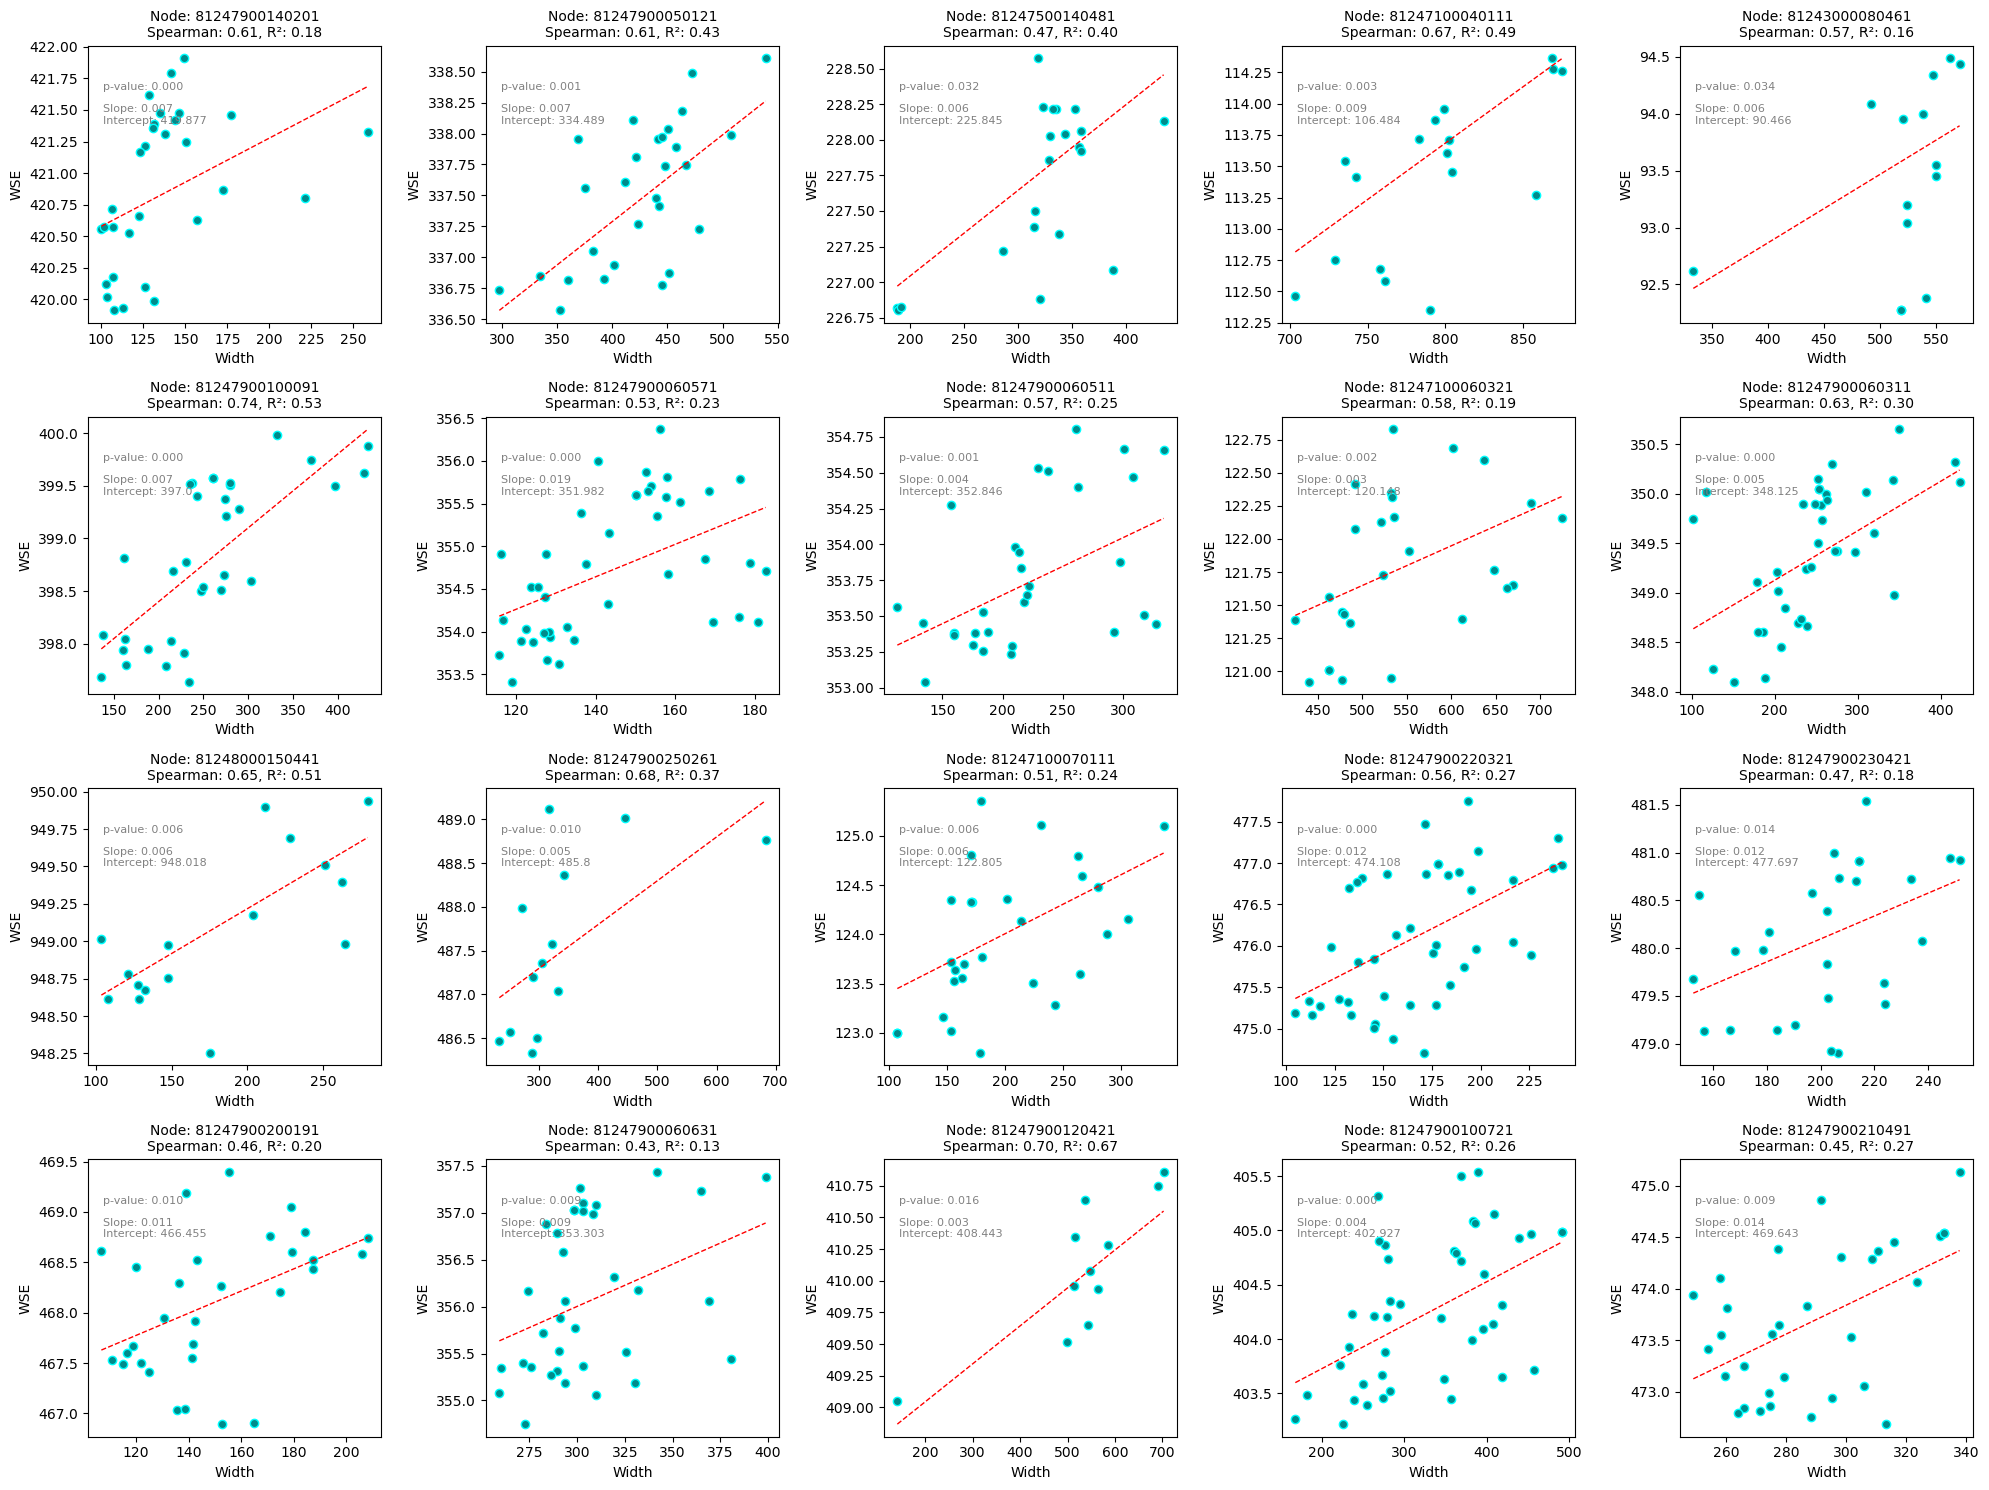

In [3]:
################## 1. Linear Regression ##################
linear_reg = l_regression(River_dict, min_spearman=0.4, min_obs=10, show_p_value=True, min_p_value=0.05)

In [4]:
linear_reg.rename(columns={'Node': 'node_id','Spearman': 'spearman_corr'}, inplace=True)
linear_reg

,node_id,spearman_corr,p_value,R2,Slope,Intercept
0,81241000070511,0.643,0.024,0.139,0.001,61.248
1,81241000100091,0.733,0.016,0.445,0.003,65.231
2,81241000100331,0.526,0.021,0.298,0.015,62.044
3,81241000100591,0.776,0.003,0.732,0.013,62.253
4,81241000100761,0.486,0.035,0.179,0.003,67.876
...,...,...,...,...,...,...
599,81247900210491,0.453,0.009,0.272,0.014,469.643
600,81247900210501,0.737,0.000,0.502,0.014,468.499
601,81247900210521,0.627,0.000,0.364,0.008,472.145
602,81247900210531,0.631,0.000,0.440,0.010,472.104


In [ ]:
export_dataframe(linear_reg,is_geodataframe=False)

In [5]:
river_gpkg = call_file()

2024-11-24 10:55:49.186 python[14743:577601] +[IMKInputSession subclass]: chose IMKInputSession_Modern


In [6]:
## Define the common column used for merging, e.g., "id" (replace "id" with your actual column name)
common_column = "node_id"
#Merge the geodataframe with the dataframe
l_regression = river_gpkg.merge(linear_reg, on=common_column).T.drop_duplicates().T # Drop duplicate columns

In [7]:
#l_regression['geometry'] = gpd.GeoSeries.from_wkt(l_regression['geometry'])
l_regression = gpd.GeoDataFrame(l_regression, geometry='geometry', crs="EPSG:4326")
# Ensure Slope and Intercept are real numbers and round them to 3 decimals
l_regression['Slope'] = pd.to_numeric(l_regression['Slope'], errors='coerce').round(3).map(lambda x: f"{x:.3f}")
l_regression['Intercept'] = pd.to_numeric(l_regression['Intercept'], errors='coerce').round(3).map(lambda x: f"{x:.3f}")

In [8]:
export_dataframe(l_regression,is_geodataframe=True)

2024-11-24 10:56:12.449 python[14743:577601] The class 'NSSavePanel' overrides the method identifier.  This method is implemented by class 'NSWindow'


GeoDataFrame has been exported as a GeoPackage to /Users/josele/Library/CloudStorage/GoogleDrive-ejdvc757@gmail.com/Other computers/My MacBook Pro/PhD/Dissertation/3_output/Tanana/Shps/No_Norm/8_bits/dark_f_030/reg_Tan_N_8030_10obs_CV_04.gpkg


In [ ]:
l_regression